# Create MODIS Subset Grids
This tutorial shows how to create GeoTiff grids from [MODIS Subsets API](https://modis.ornl.gov/data/modis_webservice.html) response.

In [1]:
import requests
import numpy as np
import rasterio
baseurl ="https://modis.ornl.gov/rst/api/v1/"
product = "MOD13Q1"

modis_api = baseurl + "/" + product + "/subset"


In [2]:
# first set of parameters
params1 = {
    "latitude": 36, 
    "longitude": 100,
    "startDate": 'A2003001',
    "endDate": 'A2003001',
    "kmAboveBelow": 1,
    "kmLeftRight": 1,
    "band": "250m_16_days_EVI"
}

# API response
response1 = requests.get(modis_api, params=params1).json()
xllcorner = float(response1['xllcorner'])
yllcorner = float(response1['yllcorner'])
cellsize = float(response1['cellsize'])
nrows = int(response1['nrows'])
ncols = int(response1['ncols'])
scale = float(response1['scale'])
subset = np.array(response1['subset'][0]['data'], dtype = 'int32')

# create a grid with correct orientation
subset = np.flipud(subset.reshape(nrows, ncols))

# sinusoidal projection
crs = '+proj=sinu +R=6371007.181 +nadgrids=@null +wktext'

# affine transformation
transform = rasterio.transform.from_origin(xllcorner, yllcorner, cellsize, -cellsize)

# writing to geotiff
with rasterio.open('grid1.tif', 'w', driver='GTiff', height=nrows, width=ncols, count=1, dtype=subset.dtype,
                            crs=crs, transform=transform) as grid1:
    grid1.write(subset, 1)

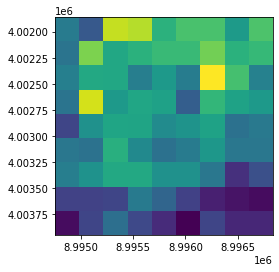

In [5]:
from rasterio.plot import show
with rasterio.open('grid1.tif') as src:
    grid2 = src.read(1, masked=True)
    show(grid2, transform=src.transform)